In [27]:
import math
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

datausdc=yf.download("USDC-USD", start="2018-10-08", end="2023-04-21")
datausdt=yf.download("USDT-USD", start="2018-10-08", end="2023-04-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
datausdc

Price,Close,High,Low,Open,Volume
Ticker,USDC-USD,USDC-USD,USDC-USD,USDC-USD,USDC-USD
Date,,,,,
2018-10-08,1.002210,1.007680,1.001900,1.004100,382900
2018-10-09,1.006860,1.008330,1.000030,1.004270,108803
2018-10-10,1.009620,1.019080,1.003970,1.004940,711783
2018-10-11,1.009780,1.031230,1.001730,1.009940,4177290
2018-10-12,1.012720,1.018710,1.001140,1.008610,1322240
...,...,...,...,...,...
2023-04-16,0.999705,1.000218,0.998947,0.999803,3945942527
2023-04-17,0.999865,1.000121,0.999178,0.999621,4388563239


In [31]:
datausdt

Price,Close,High,Low,Open,Volume
Ticker,USDT-USD,USDT-USD,USDT-USD,USDT-USD,USDT-USD
Date,,,,,
2018-10-08,0.995814,1.000110,0.990055,0.996229,2594100000
2018-10-09,0.996779,0.999826,0.991899,0.996374,2183500000
2018-10-10,0.993502,1.001830,0.990803,0.995332,2295300000
2018-10-11,0.993026,1.017550,0.987252,0.992934,3772600000
2018-10-12,0.994102,0.998704,0.983670,0.998704,2962380000
...,...,...,...,...,...
2023-04-16,1.000536,1.001188,0.999741,1.000697,24405645675
2023-04-17,1.000530,1.001024,0.999914,1.000410,32406207872


In [61]:
# Flatten column headers for datausdc
datausdc.columns = datausdc.columns.get_level_values(0)

# Flatten column headers for datausdt
datausdt.columns = datausdt.columns.get_level_values(0)

data3=datausdc / datausdt
data3

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-10-08,1.006423,1.007569,1.011964,1.007901,0.000148
2018-10-09,1.010114,1.008505,1.008197,1.007925,0.000050
2018-10-10,1.016223,1.017219,1.013289,1.009653,0.000310
2018-10-11,1.016872,1.013444,1.014665,1.017127,0.001107
2018-10-12,1.018728,1.020032,1.017760,1.009919,0.000446
...,...,...,...,...,...
2023-04-16,0.999169,0.999031,0.999206,0.999107,0.161682
2023-04-17,0.999335,0.999098,0.999264,0.999211,0.135424
2023-04-18,0.999623,0.999500,0.999754,0.999318,0.136554


In [63]:
dat=data3['Close']
print(type(dat))
print(dat)

<class 'pandas.core.series.Series'>
Date
2018-10-08    1.006423
2018-10-09    1.010114
2018-10-10    1.016223
2018-10-11    1.016872
2018-10-12    1.018728
                ...   
2023-04-16    0.999169
2023-04-17    0.999335
2023-04-18    0.999623
2023-04-19    0.999492
2023-04-20    0.999943
Name: Close, Length: 1656, dtype: float64


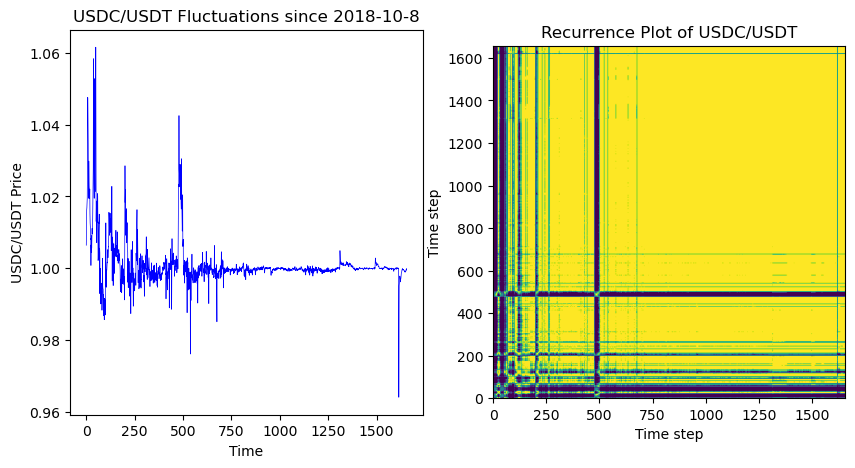

In [75]:
dat = pd.to_numeric(dat, errors='coerce')
dat=dat.dropna()

x = np.array(dat.values)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Plot the time series in the first subplot
ax1.plot(range(len(x)), x, 'b-', linewidth=.5)
ax1.set_xlabel('Time')
ax1.set_ylabel('USDC/USDT Price')
ax1.set_title('USDC/USDT Fluctuations since 2018-10-8')
n_end=len(x)

# Create a recurrence plot in the second subplot
R = np.zeros((n_end, n_end))
for i in range(n_end):
    for j in range(i, n_end):
        if abs(x[i] - x[j]) < 0.01:
            R[i, j] = 1
            R[j, i] = 1
ax2.imshow(R, cmap='viridis', origin='lower', vmin=0, vmax=1)
ax2.set_xlabel('Time step')
ax2.set_ylabel('Time step')
ax2.set_title('Recurrence Plot of USDC/USDT')

# Display the plots

plt.savefig("usdc-usdt.jpg", dpi=100)
plt.show()